<a href="https://colab.research.google.com/github/Tanmay-jam/Pytorch-Digit-Classifier/blob/main/Handwritten_Digits_Classifier_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

**Loading Data**

The dataset is not normalized and hence mean and standard deviation of data is 0.1307 and 0.3081

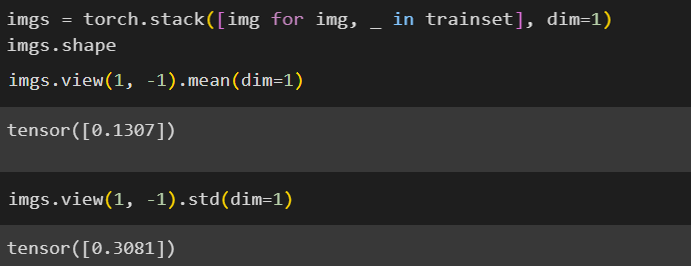

While loading data we apply transforms.

1. convert images to tensor
2. Normalize dataset with mean=0.1307 and standar deviation=0.3081

Normalization helps to get pixel values to optimal range and better comparison of values.

Data is loaded into training set and testing set differently with batch size of 64. Getting data in batches makes training faster.


In [2]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.1307), (0.3081))
                               ])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST('MNIST_data/',download=True, train=True, transform=transform)
traindataloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST('MNIST_data/',download=True, train=False, transform=transform)
testdataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 88136418.31it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 67711399.57it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26630719.75it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5327329.07it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Each batch contains 64 grayscale images with 28 by 28 pixels.

**Visualizing data**

In [3]:
## This cell contains a function for showing 5 images from a dataloader##
def show5(imgdataloader):
    dataiter = iter(imgdataloader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

3


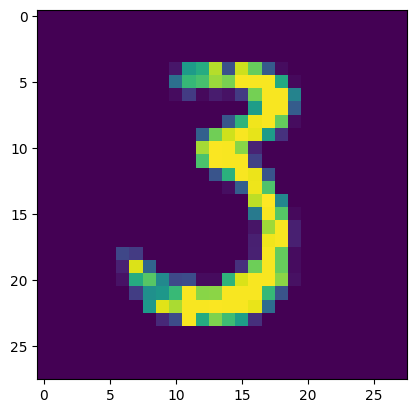

0


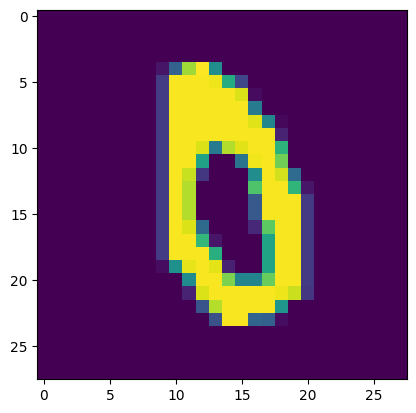

4


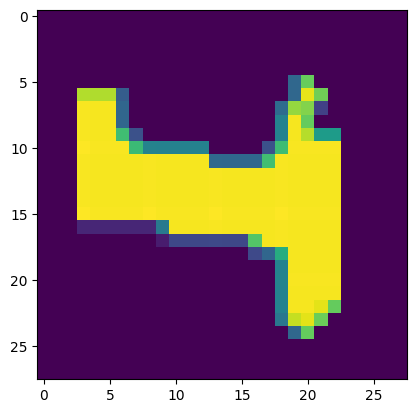

6


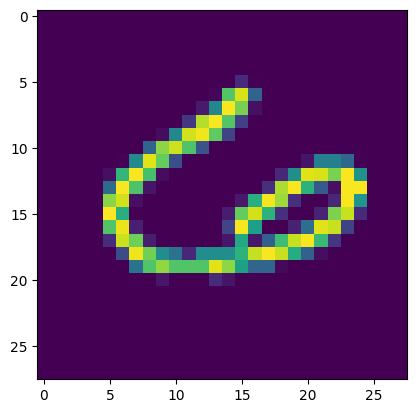

8


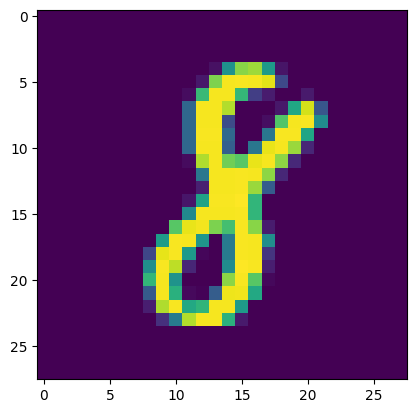

In [4]:
# Explore data
show5(traindataloader)

**Building Model**

In [5]:
#Base Model
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.hidden2 = nn.Linear(256, 144)
        self.output = nn.Linear(144, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = self.hidden1(x)
        x = self.sigmoid(x)
        x = self.hidden2(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

In [6]:
#model instansiation
model = Network()

#defining loss criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [7]:
#Training
avg_loss = list()
for epoch in range(10):
    running_loss = 0.0
    for i, (images, labels) in enumerate(traindataloader):
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backward pass and update weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    avg_loss.append(running_loss)
    print("average loss in", epoch," epoch: ",running_loss)

<ipython-input-5-034795803958>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


average loss in 0  epoch:  2159.5470821857452
average loss in 1  epoch:  2158.2210578918457
average loss in 2  epoch:  2157.0619888305664
average loss in 3  epoch:  2155.7319011688232
average loss in 4  epoch:  2153.9525208473206
average loss in 5  epoch:  2151.204169988632
average loss in 6  epoch:  2146.1637053489685
average loss in 7  epoch:  2135.6616249084473
average loss in 8  epoch:  2115.266278743744
average loss in 9  epoch:  2091.780041217804


In [8]:
#evaluate model on test set
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testdataloader:
    outputs = model(images)
    j, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print("Total images in test: ",total)
  print(f'Accuracy of the model on 10000 test images: ', 100*correct/total)


<ipython-input-5-034795803958>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


Total images in test:  10000
Accuracy of the model on 10000 test images:  21.07


**Improve Model**

In [9]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = self.hidden1(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x


model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


#Training process
avg_loss = list()
for epoch in range(10):
    running_loss = 0.0
    for i, (images, labels) in enumerate(traindataloader):
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #Zero gradients perform a backward pass and update weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    avg_loss.append(running_loss)
    print("average loss in", epoch," epoch: ",running_loss)



#evaluate model on test set
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testdataloader:
    outputs = model(images)
    j, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print("Total images in test: ",total)
  print(f'Accuracy of the model on 10000 test images: ', 100*correct/total)


<ipython-input-9-ca48247c7afb>:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


average loss in 0  epoch:  2128.360936641693
average loss in 1  epoch:  2030.8077869415283
average loss in 2  epoch:  1929.0851217508316
average loss in 3  epoch:  1844.42997276783
average loss in 4  epoch:  1793.157180428505
average loss in 5  epoch:  1756.2195031642914
average loss in 6  epoch:  1734.6837713718414
average loss in 7  epoch:  1711.4255549907684
average loss in 8  epoch:  1674.8679212331772
average loss in 9  epoch:  1653.9161540269852
Total images in test:  10000
Accuracy of the model on 10000 test images:  75.07


Removing second hidden layer causes increase in acuuracy from 21.07% to 75.07%

In [10]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax()
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = self.hidden1(x)
        x = self.tanh(x)
        x = self.output(x)
        x = self.softmax(x)
        return x


model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


#Training process
avg_loss = list()
for epoch in range(10):
    running_loss = 0.0
    for i, (images, labels) in enumerate(traindataloader):
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #Zero gradients perform a backward pass and update weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    avg_loss.append(running_loss)
    print("average loss in", epoch," epoch: ",running_loss)



#evaluate model on test set
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testdataloader:
    outputs = model(images)
    j, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print("Total images in test: ",total)
  print(f'Accuracy of the model on 10000 test images: ', 100*correct/total)


<ipython-input-10-06f299cd8bed>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


average loss in 0  epoch:  1859.3711713552475
average loss in 1  epoch:  1603.0361320972443
average loss in 2  epoch:  1532.8888928890228
average loss in 3  epoch:  1505.30626475811
average loss in 4  epoch:  1491.164712190628
average loss in 5  epoch:  1482.0869504213333
average loss in 6  epoch:  1475.582813858986
average loss in 7  epoch:  1470.4342267513275
average loss in 8  epoch:  1466.352390885353
average loss in 9  epoch:  1462.8064433336258
Total images in test:  10000
Accuracy of the model on 10000 test images:  92.29


Replacing sigmoid activation function with tanh increses accuracy on test data from 75.07% to 92.29%

In [11]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.logsoftmax = nn.LogSoftmax()
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = self.hidden1(x)
        x = self.tanh(x)
        x = self.output(x)
        x = self.logsoftmax(x)
        return x


model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


#Training process
avg_loss = list()
for epoch in range(10):
    running_loss = 0.0
    for i, (images, labels) in enumerate(traindataloader):
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #Zero gradients perform a backward pass and update weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    avg_loss.append(running_loss)
    print("average loss in", epoch," epoch: ",running_loss)



#evaluate model on test set
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testdataloader:
    outputs = model(images)
    j, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print("Total images in test: ",total)
  print(f'Accuracy of the model on 10000 test images: ', 100*correct/total)


<ipython-input-11-1053792529f4>:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.logsoftmax(x)


average loss in 0  epoch:  536.621066108346
average loss in 1  epoch:  299.4957942292094
average loss in 2  epoch:  258.92718206346035
average loss in 3  epoch:  232.21387386322021
average loss in 4  epoch:  210.67527032643557
average loss in 5  epoch:  192.60972280427814
average loss in 6  epoch:  177.16187735274434
average loss in 7  epoch:  164.06953786686063
average loss in 8  epoch:  152.75375337339938
average loss in 9  epoch:  142.75278687477112
Total images in test:  10000
Accuracy of the model on 10000 test images:  95.71


Replacing Softmax activation function with Logsotmax increases accuracy on test data from 92.29% to 95.71%

In [12]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.logsoftmax = nn.LogSoftmax()
        self.flat = nn.Flatten()

    def forward(self, x):
        x = self.flat(x)
        x = self.hidden1(x)
        x = self.tanh(x)
        x = self.output(x)
        x = self.logsoftmax(x)
        return x


model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


#Training
avg_loss = list()
for epoch in range(15):
    running_loss = 0.0
    for i, (images, labels) in enumerate(traindataloader):
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backward pass and update weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    avg_loss.append(running_loss)
    print("average loss in", epoch," epoch: ",running_loss)



#evaluate model on test set
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testdataloader:
    outputs = model(images)
    j, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print("Total images in test: ",total)
  print('Accuracy of the model on 10000 test images: ', 100*correct/total)


<ipython-input-12-72e28343c83b>:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.logsoftmax(x)


average loss in 0  epoch:  546.0268440842628
average loss in 1  epoch:  299.79876932501793
average loss in 2  epoch:  258.29660319536924
average loss in 3  epoch:  231.2049175798893
average loss in 4  epoch:  209.98891500383615
average loss in 5  epoch:  192.12149964272976
average loss in 6  epoch:  177.14143504947424
average loss in 7  epoch:  164.20680380798876
average loss in 8  epoch:  152.86994116939604
average loss in 9  epoch:  143.04441633448005
average loss in 10  epoch:  134.34419703111053
average loss in 11  epoch:  126.66894758306444
average loss in 12  epoch:  119.68779164552689
average loss in 13  epoch:  113.25848091766238
average loss in 14  epoch:  107.71021906472743
Total images in test:  10000
Accuracy of the model on 10000 test images:  96.36


Increasing number of epochs to 15 increases accuracy on test data from 95.71% to 96.36%

**Save the Model**

In [13]:
torch.save(model.state_dict(), 'Digitclassifier.pth')